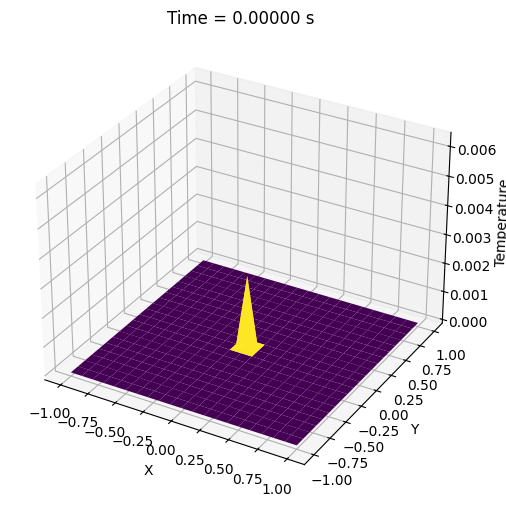

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Domain parameters
n = 10  # Given
Nx = 2 * n  # Number of divisions in x-direction
Ny = 2 * n  # Number of divisions in y-direction

x_min, x_max = -1, 1
y_min, y_max = -1, 1

dx = (x_max - x_min) / Nx
dy = (y_max - y_min) / Ny

x = np.linspace(x_min, x_max, Nx + 1)
y = np.linspace(y_min, y_max, Ny + 1)

X, Y = np.meshgrid(x, y)

# Initial condition: temperature is zero everywhere
u = np.zeros((Ny + 1, Nx + 1))

# Heat source q=1 at the center
q = np.zeros_like(u)
center_i = Ny // 2
center_j = Nx // 2
q[center_i, center_j] = 1  # Set heat source at the center node

# Time-stepping parameters
alpha = 1.0  # Thermal diffusivity
dt = min(dx, dy) ** 2 / (4 * alpha)  # Stability condition for explicit method
total_time = 1.0  # Increased total time to observe changes
nt = int(total_time / dt)  # Number of time steps

# For visualization, store solution at certain intervals
num_plots = 20  # Number of snapshots to visualize
plot_interval = max(1, nt // num_plots)

# Prepare to store solutions for visualization
solutions = []

# Time-stepping loop
for t in range(nt):
    # Compute Laplacian using finite differences
    u_xx = (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[:-2, 1:-1]) / dx ** 2
    u_yy = (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, :-2]) / dy ** 2

    # Update interior points
    u[1:-1, 1:-1] += alpha * dt * (u_xx + u_yy) + dt * q[1:-1, 1:-1]

    # Apply boundary conditions (Dirichlet: u=0 at boundaries)
    u[0, :] = 0  # y = y_min
    u[-1, :] = 0  # y = y_max
    u[:, 0] = 0  # x = x_min
    u[:, -1] = 0  # x = x_max

    # Store solutions for visualization at specified intervals
    if t % plot_interval == 0:
        solutions.append(u.copy())

# Visualization using animation
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 6))

def update_plot(frame):
    ax.clear()
    surf = ax.plot_surface(X, Y, solutions[frame], cmap=cm.viridis)
    ax.set_zlim(0, np.max(solutions[-1]))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Temperature')
    ax.set_title(f'Time = {frame * dt * plot_interval:.5f} s')
    return surf,

# Create the animation
anim = FuncAnimation(fig, update_plot, frames=len(solutions), interval=200, blit=False)

# Display the animation in the notebook
HTML(anim.to_jshtml())
